# VP5002RP

# Assesment 1

* Consider a k-armed bandit problem with k = 4 actions, denoted 1, 2, 3, and 4.
* Consider applying to this problem a bandit algorithm using initial estimates of Q1(a) = 0, for all a.
* Suppose the reward Ri alternates between -i and i (if a time t, Ri = i, at time t+1 Ri = −i).

#### 1- Implement the simple bandit algorithm on this problem. Randomly choose an action at each time.

In [1]:
import numpy as np
import random as rd
import math as mt
import pandas as pd

In [2]:
def Bandit_Algo(T):
    Q=np.zeros(4)
    N=[0,0,0,0]
    R=[1,2,3,4]
    reward=[]
    reward_mean=[]
    Qt=[]
    cpt=1
    while cpt < T:
        r=np.random.choice(R)
        ind=R.index(r)
        R[ind]=-r
        N[ind]=1+int(N[ind])
        Q[ind]=Q[ind]+(1/N[ind])*(r-Q[ind])
        Qt.append(Q[ind])
        cpt+=1
        reward.append(r)
        reward_mean.append(sum(reward)/len(reward))
        lst= [Q,N]
        df = pd.DataFrame(lst, columns = ['Action 1','Action 2','Action 3','Action 4'])       
    return df, Qt,reward_mean,reward
     

In [3]:
tab,Q_t,rewad_mean,reward=Bandit_Algo(50)

(array([6., 5., 6., 6., 0., 0., 6., 7., 6., 7.]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <BarContainer object of 10 artists>)

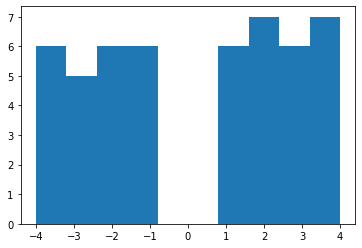

In [4]:

import matplotlib.pyplot as plt
plt.hist(reward)

* Cette table donne la frequence des recompenses avec lesquelles elles sont choisis

In [5]:
tab

,Action 1,Action 2,Action 3,Action 4
0,2.775558e-17,0.153846,0.272727,0.307692
1,1.200000e+01,13.000000,11.000000,13.000000


* Cette table donne le nombre d'action effectuées pour chaques action et la recompense finale pour chaquea actions

Text(0, 0.5, 'Recompense pour chaque iterration')

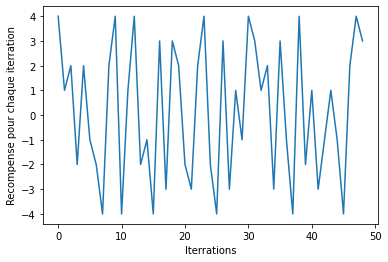

In [6]:
import matplotlib.pyplot as plt
plt.plot(reward)
plt.xlabel('Iterrations')
plt.ylabel('Recompense pour chaque iterration')

* Cette figure donne la recompense a chaque iterrations

Text(0, 0.5, 'Recompense moyenne a chaque instant t')

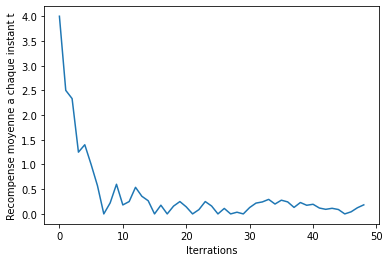

In [7]:
import matplotlib.pyplot as plt
plt.plot(rewad_mean)
plt.xlabel('Iterrations')
plt.ylabel('Recompense moyenne a chaque instant t')

* Cette courbe donne la recompense moyenne a chaque instant $t$ pendant les $1000$ temps d'iterations

Text(0, 0.5, 'Q à chaque iterations')

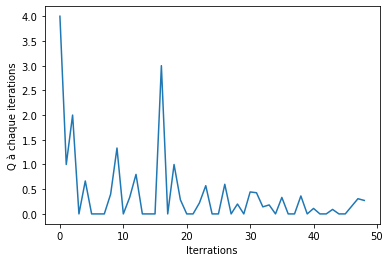

In [8]:
plt.plot(Q_t)
plt.xlabel('Iterrations')
plt.ylabel('Q à chaque iterations')

## Epsilone Greedy Action

In [9]:
def gred_Action(end,espsilon):
    Q=[0,0,0,0]
    N=[0,0,0,0]
    R=[1,2,3,4]
    D=[]
    reward_mean=[]
    Qt=[]
    rand=[1,2]
    i=0
    while i < end:
        rdd=np.random.choice(rand,p=[1-espsilon,espsilon])
        if rdd==1 :                    #on fait une exploitation en utlisant le greedy Action
            m= max(Q)                   ## On recupere la plus grande reconpense
            ind= Q.index(m)             ## on recupere l'indice de la plus grande recompence
            r=  R[ind]   ### on joue l'action qui a la plus grande reconpence
            R[ind]=-r
            N[ind]=1+N[ind]
            Q[ind]=Q[ind]+(1/N[ind])*(r-Q[ind])
        else:                           ### On fait une exploration
            r=np.random.choice(R)
            ind=R.index(r)
            R[ind]=-r
            N[ind]=1+N[ind]
            Q[ind]=Q[ind]+(1/N[ind])*(r-Q[ind])
        i+=1
        D.append(r)
        reward_mean.append(sum(D)/len(D))
        Qt.append(Q[ind])

    lst= [Q,N]
    df = pd.DataFrame(lst, columns = ['Action 1','Action 2','Action 3','Action 4'])
    return df,Qt,reward_mean,D

In [13]:
df,Qt,reward_mean,D=gred_Action(50,0.3)


In [14]:
df

,Action 1,Action 2,Action 3,Action 4
0,4.163336e-17,6.938894e-17,0.0,0.0
1,1.600000e+01,2.600000e+01,4.0,4.0


* Cette table donne le nombre d'action effectuées pour chaques action et la recompense finale pour chaquea actions

Text(0, 0.5, 'Recompense pour chaque iterration')

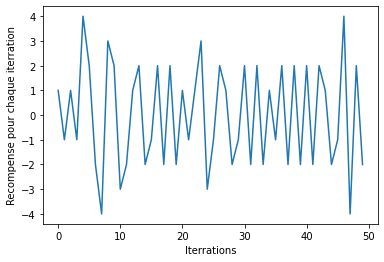

In [15]:
import matplotlib.pyplot as plt
plt.plot(D)
plt.xlabel('Iterrations')
plt.ylabel('Recompense pour chaque iterration')

* Cette figure donne la recompense a chaque iterrations

Text(0, 0.5, 'Q à chaque iterations')

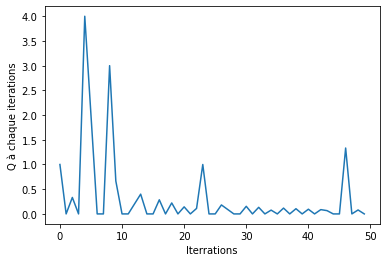

In [16]:
plt.plot(Qt)
plt.xlabel('Iterrations')
plt.ylabel('Q à chaque iterations')

Text(0, 0.5, 'Q à chaque iterations')

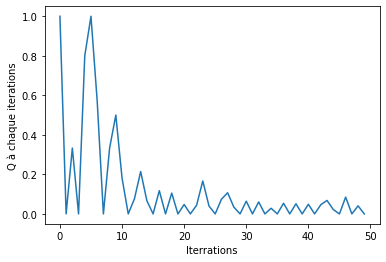

In [17]:
plt.plot(reward_mean)
plt.xlabel('Iterrations')
plt.ylabel('Q à chaque iterations')

* Cette courbe donne la recompense moyenne a chaque instant $t$ pendant les $50$ temps d'iterations

(array([ 2.,  2., 13.,  8.,  0.,  0.,  8., 13.,  2.,  2.]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <BarContainer object of 10 artists>)

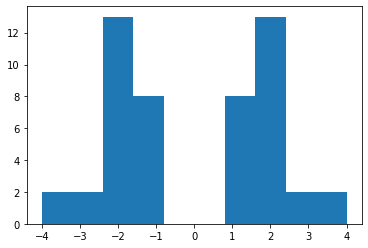

In [18]:
#gred_Action(100,0.6)
import matplotlib.pyplot as plt
plt.hist(D)

* Cette table donne la frequence des recompenses avec lesquelles elles sont choisis

## Do the same using the preference.

In [19]:
def softmax(H):
    h = H - np.max(H)
    exp = np.exp(h)
    return exp / np.sum(exp)

In [20]:
def softmax(x):
    return np.exp(x - x.max()) / np.sum(np.exp(x - x.max()), axis=0)


In [21]:
def gradient_bandit(n,R,alpha):
    N=[0,0,0,0]
    Q=[0,0,0,0]
    D=[];reward_mean=[]
    H = np.zeros(4) # preference
    r_hist = []
    alpha = alpha
    for t in range(1, n):
        policy = softmax(H) # la politique
        # on choisir une action a partir de la politique definir par softmax
        a = np.random.choice(4, p=policy) 
        r = R[a] # R_t (reward pour une action choisi
        R[a]=-r
        N[a]+=1
        Q[a]=Q[a]+(1/N[a])*(r-Q[a]) 
        r_hist.append(r)
        avg_r = np.average(r_hist)
        # update a == A_t (chosen action)
        H[a] = H[a] + alpha*(r-avg_r)*(1-policy[a])
        # update a != A_t (non-chosen action)
        H[:a] = H[:a] - alpha*(r-avg_r)*policy[:a]
        H[a+1:] = H[a+1:] - alpha*(r-avg_r)*policy[a+1:]
        D.append(r)
        reward_mean.append(sum(D)/len(D))
        lst= [Q,N]
        df = pd.DataFrame(lst, columns = ['Action 1','Action 2','Action 3','Action 4'])
    return df,softmax(H), r_hist,reward_mean

In [22]:
R=[1,2,3,4]

df,softma, r_hist,rewar_mean = gradient_bandit(50,R,alpha=0.1)


Text(0, 0.5, 'Recompense pour chaque iterration')

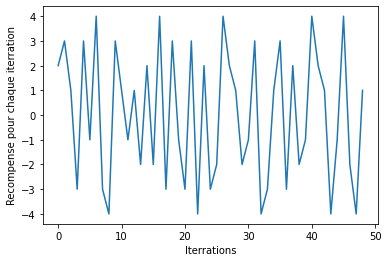

In [23]:
plt.plot(r_hist)
plt.xlabel('Iterrations')
plt.ylabel('Recompense pour chaque iterration')

*   Cette figure donne la recompense a chaque iterrations

* Cette table donne le nombre d'action effectuées pour chaques action et la recompense finale pour chaquea actions

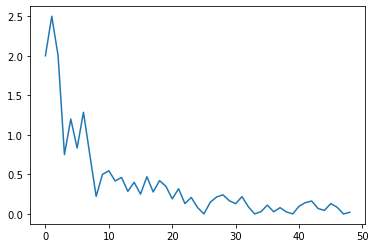

In [24]:
plt.plot(rewar_mean)

* Cette courbe donne la recompense moyenne a chaque instant $t$ pendant les $50$ temps d'iterations

In [25]:
softma

array([0.21991299, 0.25275353, 0.17864759, 0.34868589])

In [26]:

for p in softma:
    print ("{:.2%}\t".format(p))


21.99%	
25.28%	
17.86%	
34.87%	


* On a les preference de chaque actions 

## Test many values of alpha

In [29]:
df01,softma01, r_hist01,rewar_mean01 = gradient_bandit(50,R,alpha=0.1)
df03,softma03, r_hist03,rewar_mean03 = gradient_bandit(50,R,alpha=0.3)
df05,softma05, r_hist05,rewar_mean05 = gradient_bandit(50,R,alpha=0.5)

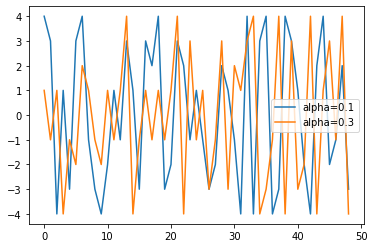

In [34]:
plt.plot(r_hist01,label="alpha=0.1")

plt.plot(r_hist03,label='alpha=0.3')
plt.legend()
plt.show()

## Do the same using the reward probabilities change over time.

In [32]:
def prob_change_time(T,alpha):
    Q=np.zeros(4)
    N=[0,0,0,0]
    R=[1,2,3,4]
    reward=[]
    reward_mean=[]
    Qt=[]
    cpt=1
    while cpt < T:
        r=np.random.choice(R)
        ind=R.index(r)
        R[ind]=-r
        N[ind]=1+int(N[ind])
        Q[ind]=Q[ind]+alpha*(r-Q[ind])
        Qt.append(Q[ind])
        cpt+=1
        reward.append(r)
        reward_mean.append(sum(reward)/len(reward))
        lst= [Q,N]
        df = pd.DataFrame(lst, columns = ['Action 1','Action 2','Action 3','Action 4'])       
    return df, Qt,reward_mean,reward
    

In [33]:
df1, Qt2,reward_mean1,reward1=prob_change_time(T=50,alpha=0.3)

In [34]:
df1

,Action 1,Action 2,Action 3,Action 4
0,0.177308,-0.348056,0.53988,0.71984
1,15.000000,12.000000,11.00000,11.00000


Text(0, 0.5, 'Recompense pour chaque iterration')

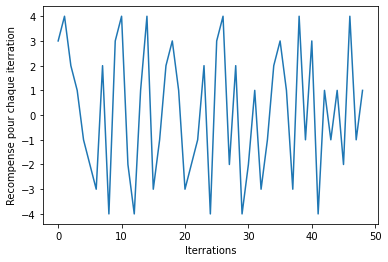

In [35]:
plt.plot(reward1)
plt.xlabel('Iterrations')
plt.ylabel('Recompense pour chaque iterration')

*   Cette figure donne la recompense a chaque iterrations

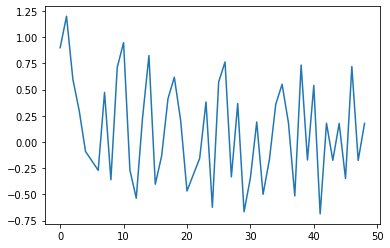

In [38]:
plt.plot(Qt2)

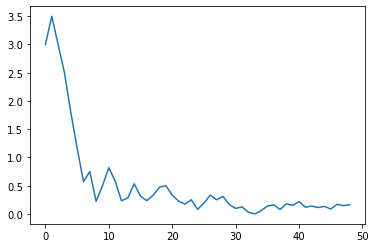

In [39]:
plt.plot(reward_mean1)

* Cette courbe donne la recompense moyenne a chaque instant $t$ pendant les $50$ temps d'iterations